In [1]:
def connected_components(pic):
    width, height = len(pic[0]), len(pic)
    labeled_pic = [[0 for x in range(width)] for y in range(height)]
    cur_label = 1

    def dfs(x, y):
        if x >= width or x < 0 or \
           y >= height or y < 0 or \
           labeled_pic[y][x] != 0 or \
           pic[y][x] == 0: return

        labeled_pic[y][x] = cur_label

        dfs(x + 1, y + 0)
        dfs(x - 1, y + 0)
        dfs(x + 0, y + 1)
        dfs(x + 0, y - 1)
        
    for y in range(height):
        for x in range(width):
            cur_label += labeled_pic[y][x] == 0 and pic[y][x] == 1
            dfs(x, y)

    return labeled_pic

In [2]:
pic = [
    [0, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 1, 0, 1, 1],
    [0, 0, 1, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 0, 0, 0, 1, 1],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 0, 0, 1],
]

In [3]:
labeled_pic = connected_components(pic)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

_, (l, r) = plt.subplots(1, 2)
l.imshow(pic).set_cmap('nipy_spectral')
r.imshow(labeled_pic).set_cmap('nipy_spectral')

In [5]:
labeled_pic

[[0, 2, 0, 0, 0, 3, 0],
 [2, 2, 2, 2, 0, 3, 3],
 [0, 0, 2, 0, 0, 3, 0],
 [0, 2, 2, 0, 3, 3, 0],
 [0, 2, 0, 0, 0, 3, 3],
 [0, 0, 0, 4, 0, 0, 0],
 [0, 0, 4, 4, 0, 0, 5]]

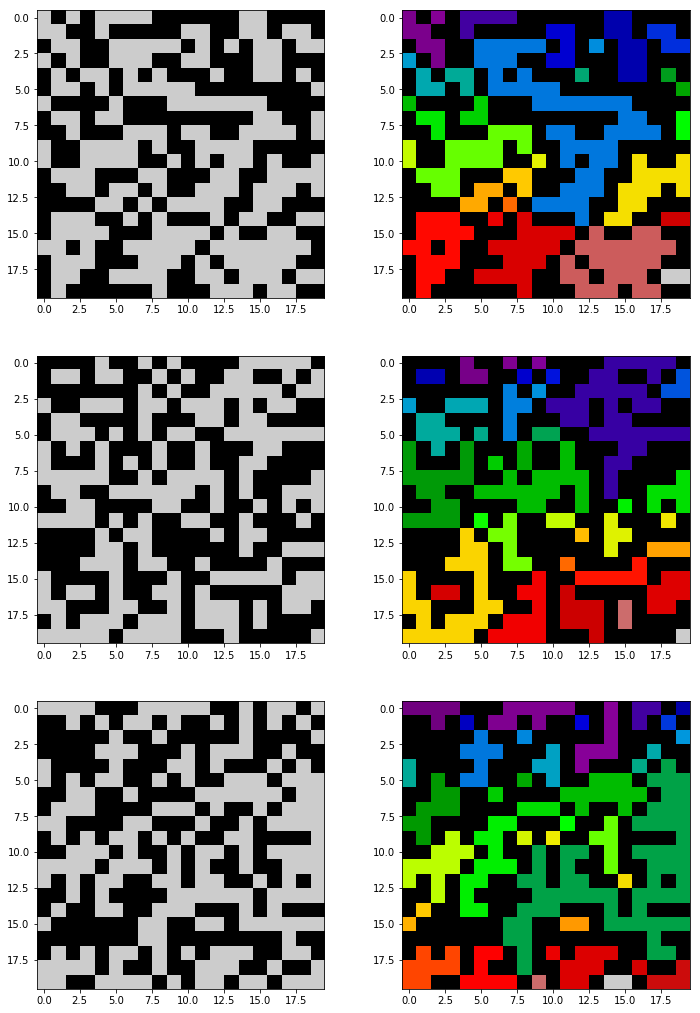

In [6]:
num_examples = 3
size = 6

_, axes = plt.subplots(num_examples, 2, figsize=[size * 2, num_examples * size])
for y in range(num_examples):
    pic = np.random.randint(2, size=[20, 20])

    impic = axes[y][0].imshow(pic)
    imcon = axes[y][1].imshow(connected_components(pic))

    impic.set_cmap('nipy_spectral')
    imcon.set_cmap('nipy_spectral')

In [12]:
%%timeit
pic = np.random.randint(2, size=[1000, 1000])
cc = connected_components(pic)

3.81 s ± 147 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
